In [1]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
import cv2
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
x_train  = x_train/255
x_test  = x_test/255

In [5]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [6]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [7]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [8]:
num_classes = 10

In [9]:
# we will do some mild image pre-processing for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [10]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Conv2D(256, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv7'))
model.add(BatchNormalization(axis=3, name='bn_conv7'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv8'))
model.add(BatchNormalization(axis=3, name='bn_conv8'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv9'))
model.add(BatchNormalization(axis=3, name='bn_conv9'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv10'))
model.add(BatchNormalization(axis=3, name='bn_conv10'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv11'))
model.add(BatchNormalization(axis=3, name='bn_conv11'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv12'))
model.add(BatchNormalization(axis=3, name='bn_conv12'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv13'))
model.add(BatchNormalization(axis=3, name='bn_conv13'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

In [11]:
batch_size = 32
epochs = 120
model_history = model.fit(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/120
1562/1562 [==============================] - 51s 26ms/step - loss: 1.5149 - accuracy: 0.4596 - val_loss: 1.2403 - val_accuracy: 0.5773
Epoch 2/120
1562/1562 [==============================] - 41s 26ms/step - loss: 1.0901 - accuracy: 0.6193 - val_loss: 1.4641 - val_accuracy: 0.5981
Epoch 3/120
1562/1562 [==============================] - 41s 26ms/step - loss: 0.9254 - accuracy: 0.6808 - val_loss: 0.8433 - val_accuracy: 0.7173
Epoch 4/120
1562/1562 [==============================] - 41s 26ms/step - loss: 0.8135 - accuracy: 0.7206 - val_loss: 0.9470 - val_accuracy: 0.6993
Epoch 5/120
1562/1562 [==============================] - 41s 26ms/step - loss: 0.7353 - accuracy: 0.7470 - val_loss: 0.8526 - val_accuracy: 0.7236
Epoch 6/120
1562/1562 [==============================] - 42s 27ms/step - loss: 0.6699 - accuracy: 0.7693 - val_loss: 0.6575 - val_accuracy: 0.7801
Epoch 7/120
1562/1562 [==============================] - 42s 27ms/step - loss: 0.6317 - accuracy: 0.7848 - val_loss: 0

In [12]:
model.save('VGG16.h5')

In [13]:
from keras import models
model = models.load_model('VGG16.h5')

In [14]:
loss, accuracy = model.evaluate(x_train,y_train)
print("Trainging Accuracy = %.2f  %%   loss = %f" % (accuracy * 100, loss))
loss, accuracy = model.evaluate(x_test,y_test)
print("Testing Accuracy = %.2f %%   loss = %f " % (accuracy* 100 , loss))

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0232 - accuracy: 0.9918
Trainging Accuracy = 99.18  %   loss = 0.023169
313/313 [==============================] - 3s 9ms/step - loss: 0.3940 - accuracy: 0.9115
Testing Accuracy = 91.15 %   loss = 0.394012 


In [15]:
predictions = model.predict(x_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

In [16]:
cm = confusion_matrix(y_test, predictions)

In [17]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

In [18]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# we will do some mild image pre-processing for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [20]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Conv2D(256, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv7'))
model.add(BatchNormalization(axis=3, name='bn_conv7'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv8'))
model.add(BatchNormalization(axis=3, name='bn_conv8'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv9'))
model.add(BatchNormalization(axis=3, name='bn_conv9'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv10'))
model.add(BatchNormalization(axis=3, name='bn_conv10'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv11'))
model.add(BatchNormalization(axis=3, name='bn_conv11'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv12'))
model.add(BatchNormalization(axis=3, name='bn_conv12'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv13'))
model.add(BatchNormalization(axis=3, name='bn_conv13'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation_15 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation_16 (Activation)  (None, 32, 32, 64)       

In [21]:
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau


batch_size = 32
epochs = 120



filepath = 'VGG-DA-weights.hdf5'
model_chk = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                            save_best_only=True,
                            save_weights_only=True, mode='auto',
                            period=1)

csv_log = CSVLogger('VGG-DA-training.log')

model_history = model.fit(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[model_chk, csv_log])

Epoch 1/120
1562/1562 [==============================] - 43s 27ms/step - loss: 1.5463 - accuracy: 0.4475 - val_loss: 1.5521 - val_accuracy: 0.5360
Epoch 2/120
1562/1562 [==============================] - 41s 26ms/step - loss: 1.1182 - accuracy: 0.6076 - val_loss: 0.9019 - val_accuracy: 0.6830
Epoch 3/120
1562/1562 [==============================] - 41s 26ms/step - loss: 0.9391 - accuracy: 0.6753 - val_loss: 0.9640 - val_accuracy: 0.6830
Epoch 4/120
1562/1562 [==============================] - 41s 26ms/step - loss: 0.8221 - accuracy: 0.7171 - val_loss: 0.9285 - val_accuracy: 0.7026
Epoch 5/120
1562/1562 [==============================] - 44s 28ms/step - loss: 0.7445 - accuracy: 0.7420 - val_loss: 0.7794 - val_accuracy: 0.7442
Epoch 6/120
1562/1562 [==============================] - 41s 26ms/step - loss: 0.6797 - accuracy: 0.7652 - val_loss: 0.6916 - val_accuracy: 0.7632
Epoch 7/120
1562/1562 [==============================] - 41s 26ms/step - loss: 0.6339 - accuracy: 0.7843 - val_loss: 0

In [22]:
loss, accuracy = model.evaluate(x_train,y_train)
print("Trainging Accuracy = %.2f  %%   loss = %f" % (accuracy * 100, loss))
loss, accuracy = model.evaluate(x_test,y_test)
print("Testing Accuracy = %.2f %%   loss = %f " % (accuracy* 100 , loss))

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0203 - accuracy: 0.9930
Trainging Accuracy = 99.30  %   loss = 0.020301
313/313 [==============================] - 3s 9ms/step - loss: 0.4012 - accuracy: 0.9108
Testing Accuracy = 91.08 %   loss = 0.401204 


In [23]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


# This time we will only use the test set:
_, (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32')
x_test /= 255
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10

y_test = np_utils.to_categorical(y_test, num_classes)

10000 test samples


In [24]:
import os

weights_path = 'VGG-DA-weights.hdf5'
out_dir = 'VGG-DA-features'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [25]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Conv2D(256, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv7'))
model.add(BatchNormalization(axis=3, name='bn_conv7'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv8'))
model.add(BatchNormalization(axis=3, name='bn_conv8'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv9'))
model.add(BatchNormalization(axis=3, name='bn_conv9'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv10'))
model.add(BatchNormalization(axis=3, name='bn_conv10'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv11'))
model.add(BatchNormalization(axis=3, name='bn_conv11'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv12'))
model.add(BatchNormalization(axis=3, name='bn_conv12'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv13'))
model.add(BatchNormalization(axis=3, name='bn_conv13'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()
model.load_weights(weights_path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation_30 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation_31 (Activation)  (None, 32, 32, 64)       

In [26]:
import numpy as np

feat_extractor = Model(inputs=model.input,
                       outputs=model.get_layer('fc1').output)

features = feat_extractor.predict(x_test, batch_size=batch_size)

np.save(os.path.join(out_dir, 'fc1_features.npy'), features)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features)
pca_features = pca.transform(features)

np.save(os.path.join(out_dir, 'fc1_features_pca_2dim.npy'), pca_features)

In [28]:
tx, ty = pca_features[:,0], pca_features[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

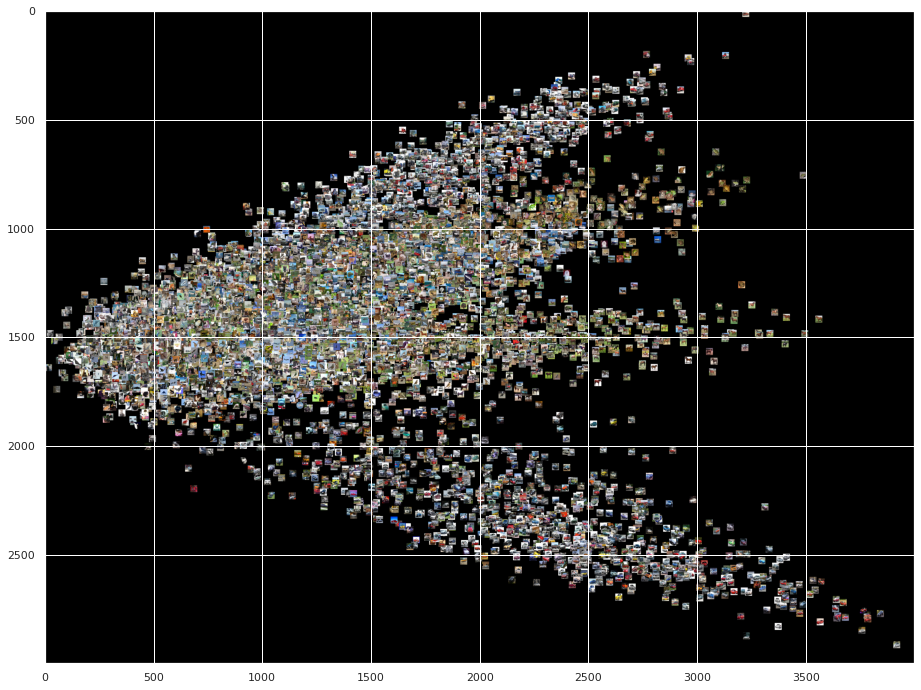

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]), int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [30]:
full_image.save(os.path.join(out_dir, "fc1_pca.jpg"))

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(features)
pca_features = pca.transform(features)

np.save(os.path.join(out_dir, 'fc1_features_pca_50dim.npy'), pca_features)

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE().fit_transform(pca_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [33]:
np.save(os.path.join(out_dir, 'fc1_features_pca_50dim_tsne.npy'), tsne)

In [34]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

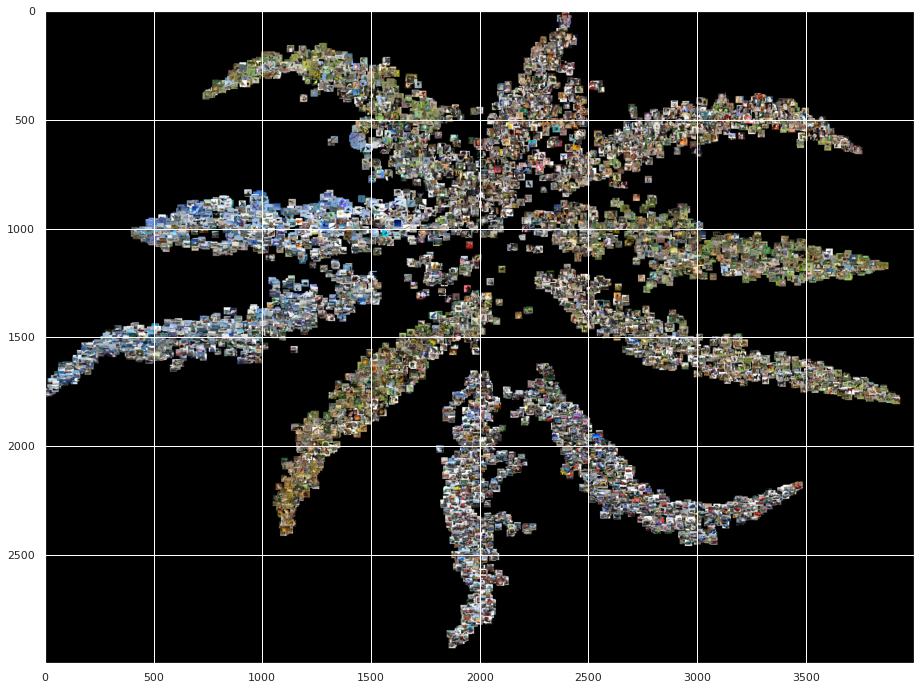

In [35]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]), int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [36]:
from sklearn.manifold import TSNE

features = np.load(os.path.join(out_dir, 'fc1_features.npy'))
tsne = TSNE().fit_transform(features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [37]:
np.save(os.path.join(out_dir, 'fc1_features_tsne_default.npy'), tsne)

In [38]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

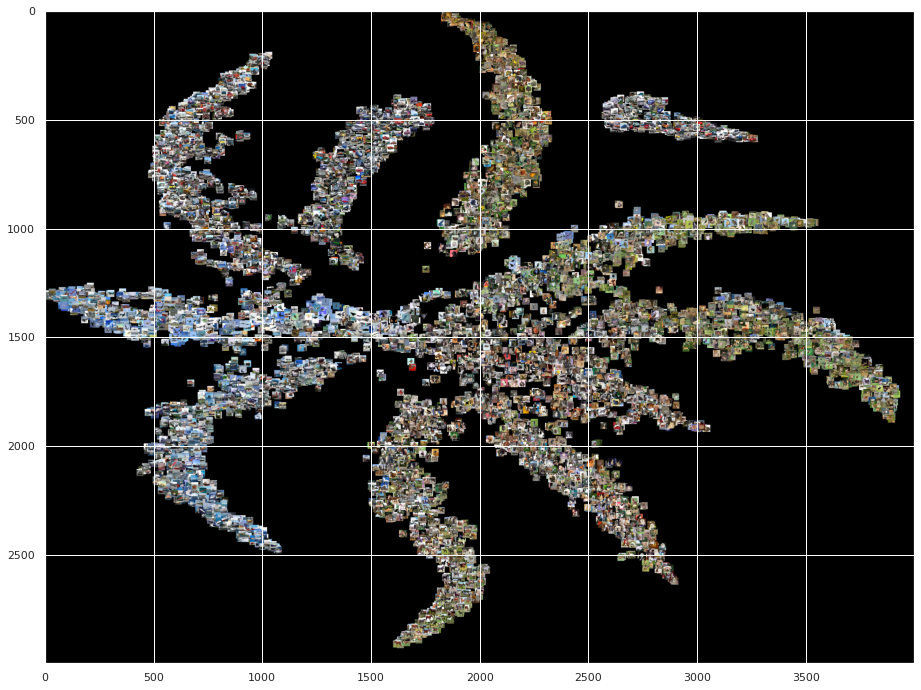

In [39]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [40]:
full_image.save(os.path.join(out_dir, "fc1_features_tsne_default.jpg"))

In [41]:
# have to re-load cifar to get y_test back in its original form
_, (x_test, y_test) = cifar10.load_data()

y_test = np.asarray(y_test)

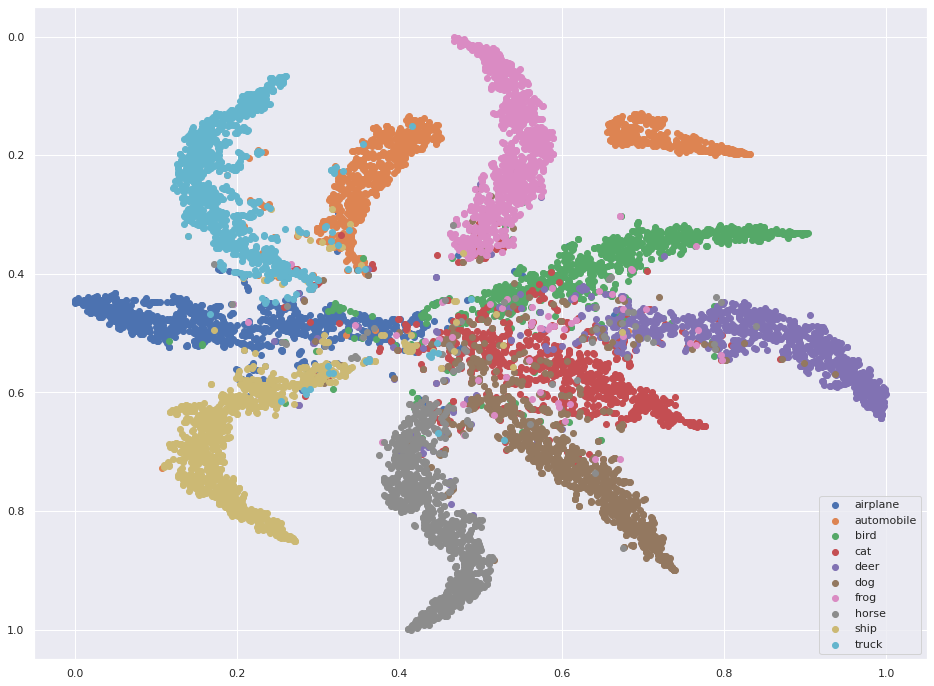

In [42]:
plt.figure(figsize = (16,12))

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(len(classes)):
    y_i = y_test == i
    plt.scatter(tx[y_i[:, 0]], ty[y_i[:, 0]], label=classes[i])
plt.legend(loc=4)
plt.gca().invert_yaxis()
plt.savefig(os.path.join(out_dir, "fc1_features_tsne_default_pts.jpg"), bbox_inches='tight')
plt.show()

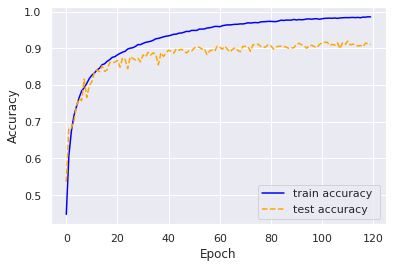

In [43]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['accuracy'],
         label='train accuracy ',
         c='blue', ls='-')
plt.plot(model_history.history['val_accuracy'],
         label='test accuracy ',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

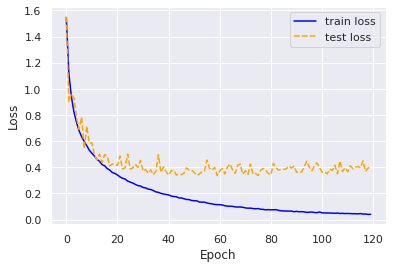

In [44]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['loss'],
         label='train loss',
         c='blue', ls='-')
plt.plot(model_history.history['val_loss'],
         label='test loss',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

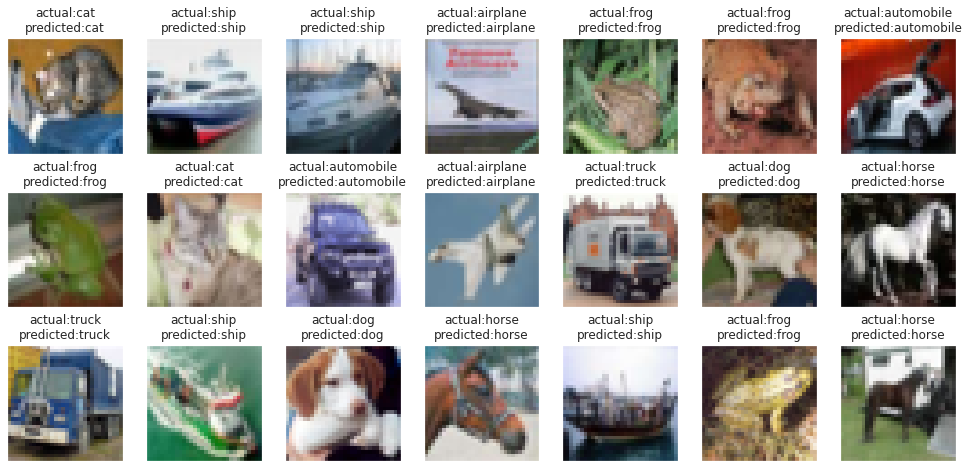

In [45]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + classes[y_test[index][0]] + '\n' 
                            + 'predicted:' + classes[predictions[index][0]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

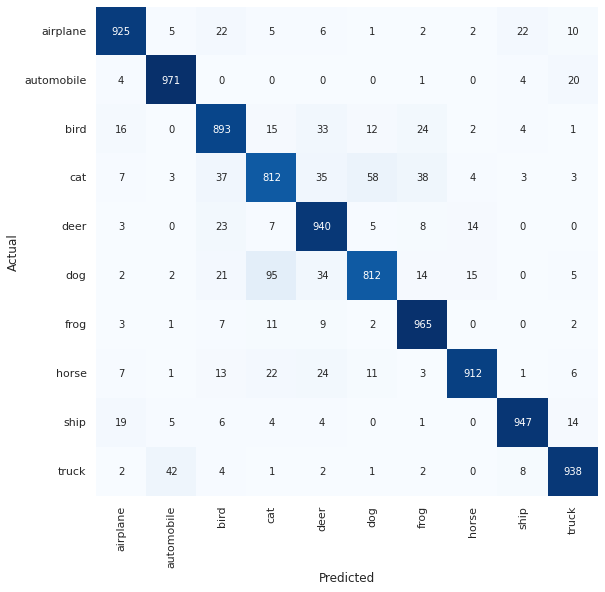

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()